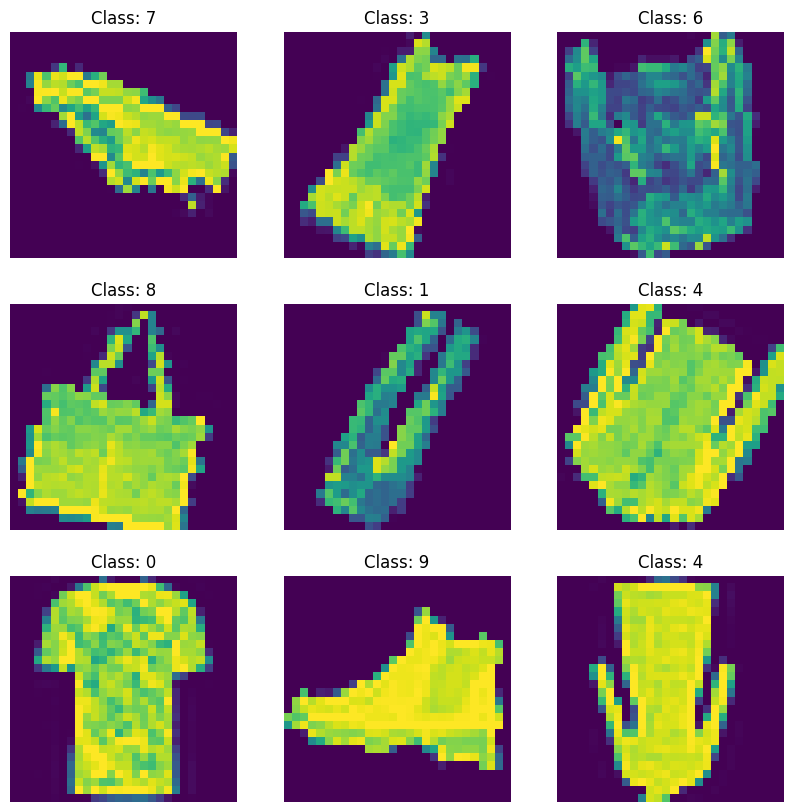

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

# Download Fashion-MNIST dataset (you can replace this with any other dataset)
train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())

# Define transformations for data augmentation
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),  # Convert PIL.Image to Tensor
])

# Apply transformations to the dataset
augmented_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=data_transform)

# Create data loaders
train_loader = DataLoader(augmented_dataset, batch_size=64, shuffle=True)

# Visualize some augmented images
def visualize_dataset(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().transpose((1, 2, 0)))
        plt.title(f"Class: {labels[i].item()}")
        plt.axis('off')
    plt.show()

visualize_dataset(train_loader)

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np

# Load Fashion-MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Display the shape of the datasets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)


In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Number of training examples: 60000
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


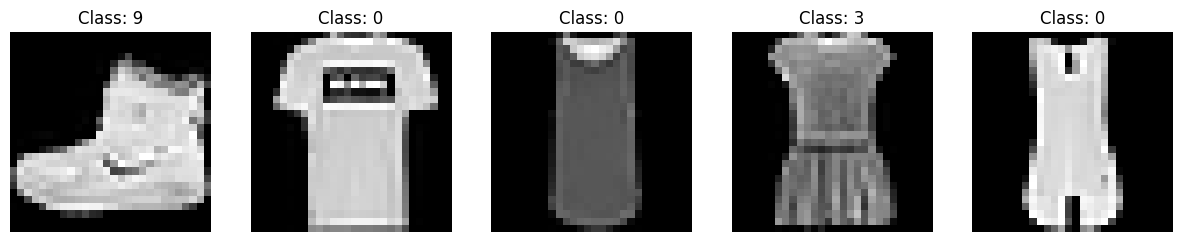

In [ ]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())

# Explore dataset size and classes
print("Number of training examples:", len(train_dataset))
print("Classes:", train_dataset.classes)

# Visualize a few examples
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title(f"Class: {label}")
    axes[i].axis('off')
plt.show()


In [ ]:
# Define transformations for data preprocessing
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),  # Convert PIL.Image to Tensor
])

# Apply transformations to the dataset
augmented_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=data_transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(augmented_dataset, [train_size, val_size])

# Create data loaders for training and validation
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

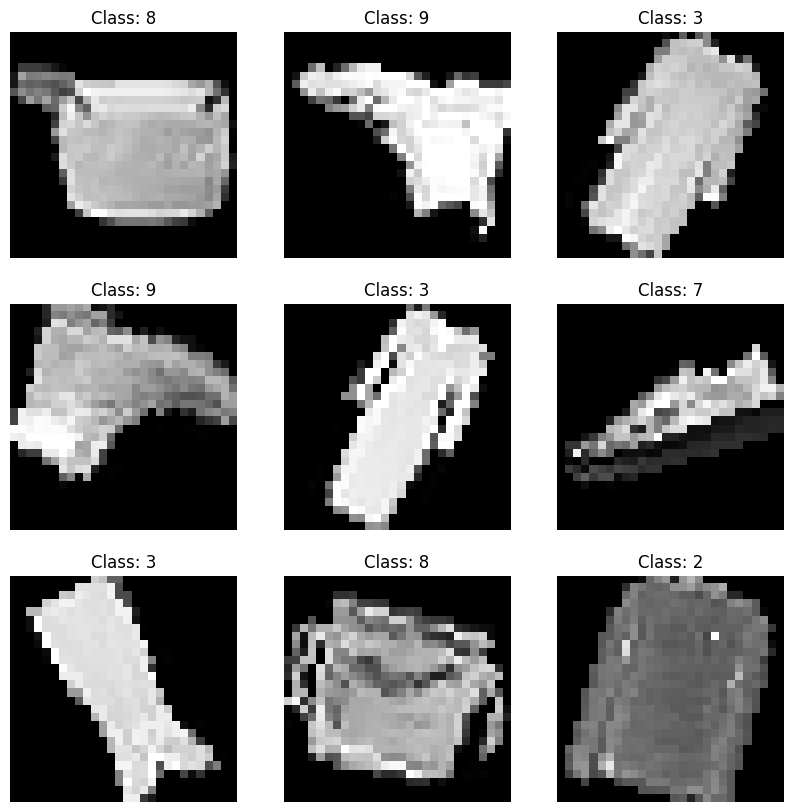

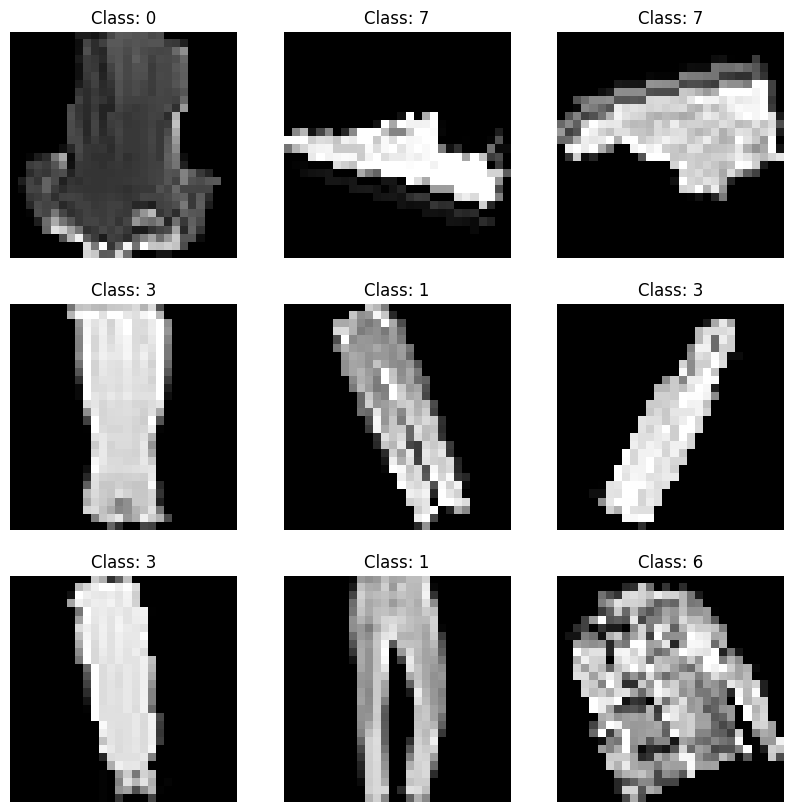

In [ ]:
# Visualize some augmented images from the training set
def visualize_dataset(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().transpose((1, 2, 0)), cmap='gray')
        plt.title(f"Class: {labels[i].item()}")
        plt.axis('off')
    plt.show()

# Visualize training set
visualize_dataset(train_loader)

# Visualize validation set
visualize_dataset(val_loader)


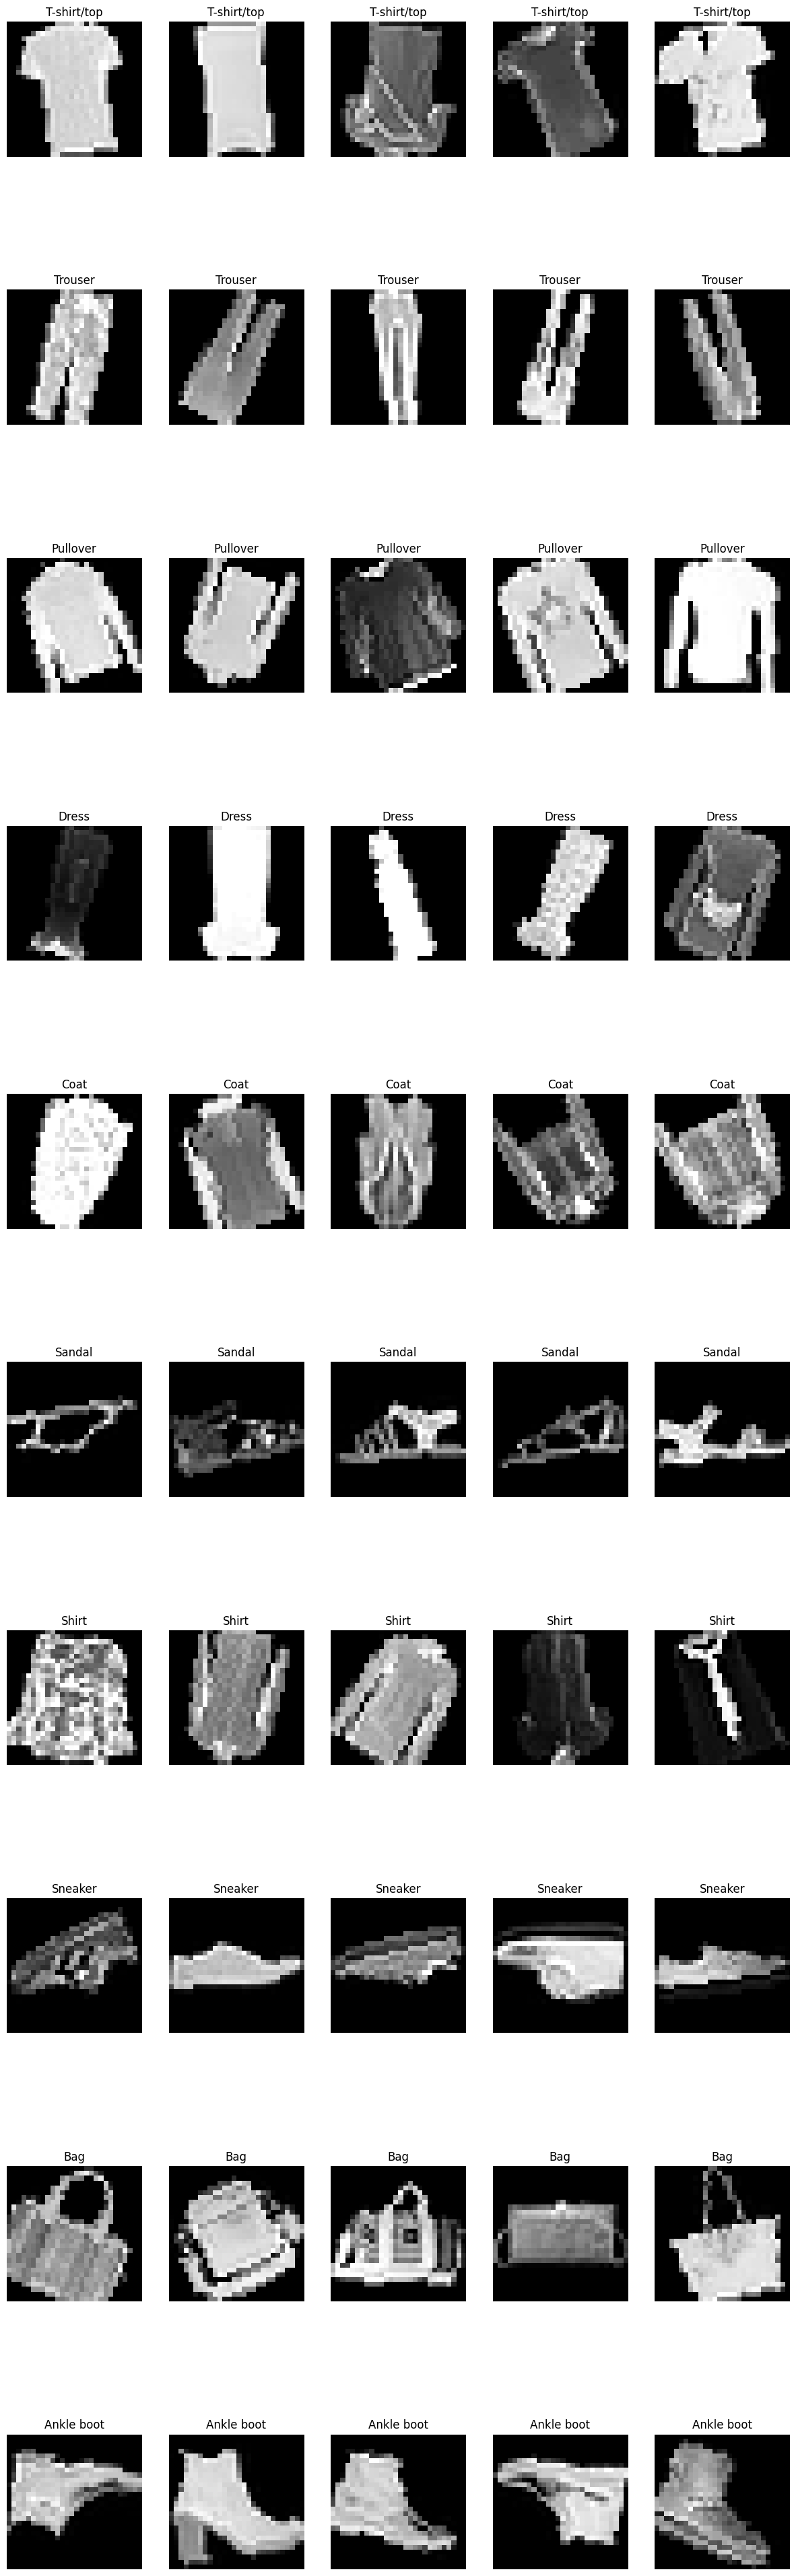

In [ ]:
def visualize_class_samples(loader, num_samples=5):
    class_names = original_dataset.classes
    class_samples = {class_name: [] for class_name in class_names}

    # Collect samples for each class
    for images, labels in loader:
        for i in range(len(labels)):
            class_name = class_names[labels[i].item()]
            if len(class_samples[class_name]) < num_samples:
                class_samples[class_name].append(images[i])

    # Display samples with more space between classes
    plt.figure(figsize=(15, len(class_names) * num_samples))
    for i, class_name in enumerate(class_names):
        for j in range(num_samples):
            plt.subplot(len(class_names), num_samples, i * num_samples + j + 1)
            plt.imshow(class_samples[class_name][j].numpy().transpose((1, 2, 0)), cmap='gray')
            plt.title(class_name)
            plt.axis('off')
        plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between rows
    plt.show()

# Visualize examples from each class in the training set
visualize_class_samples(train_loader)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes for Fashion-MNIST

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 20

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

print("Training finished")

# Save the trained model
torch.save(model.state_dict(), 'simple_cnn_model.pth')

Epoch 1/20, Loss: 0.7603164603397536
Epoch 2/20, Loss: 0.5291091377483502
Epoch 3/20, Loss: 0.4659212462143349
Epoch 4/20, Loss: 0.429750147857455
Epoch 5/20, Loss: 0.4000614796207149
Epoch 6/20, Loss: 0.38216817239994433
Epoch 7/20, Loss: 0.3652388646102536
Epoch 8/20, Loss: 0.35489117373217904
Epoch 9/20, Loss: 0.3484498928509541
Epoch 10/20, Loss: 0.335757283664652
Epoch 11/20, Loss: 0.3296915141901355
Epoch 12/20, Loss: 0.3213303390024567
Epoch 13/20, Loss: 0.3150240244594083
Epoch 14/20, Loss: 0.3106823985033961
Epoch 15/20, Loss: 0.30168384922815283
Epoch 16/20, Loss: 0.302122671129321
Epoch 17/20, Loss: 0.2935504463038592
Epoch 18/20, Loss: 0.2896608646585743
Epoch 19/20, Loss: 0.2900105168633878
Epoch 20/20, Loss: 0.28325027499054034
Training finished


In [ ]:
# Load the Fashion-MNIST test dataset
transform_test = transforms.Compose([
    transforms.ToTensor(),
])

test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Function for model evaluation on the test set
def evaluate_model(model, criterion, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)

            _, pred = torch.max(output, 1)
            correct_predictions += (pred == target).sum().item()
            total_samples += target.size(0)

    test_loss = test_loss / len(test_loader.dataset)
    accuracy = correct_predictions / total_samples

    print(f'Test Loss: {test_loss:.6f}, Test Accuracy: {accuracy * 100:.2f}%')

# Assuming the model is already defined and trained
# ...

# Evaluate the model on the test set
evaluate_model(model, criterion, test_loader)


Test Loss: 0.310644, Test Accuracy: 89.21%
